In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from scipy import misc, ndimage
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Funciones para hacer los plots, y luego guardarlos.

In [18]:
amlo_path = 'fs/amlo/pruebas/'
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15,
                        zoom_range=0.1, channel_shift_range=10, horizontal_flip=True)

def plots(n_foto, ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        plt.setp(f.gca().get_xticklabels(), visible=False)
        plt.setp(f.gca().get_yticklabels(), visible=False)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        plt.savefig(amlo_path + str(n_foto) + '_' + str(i)  + '.jpg')

def sub_plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

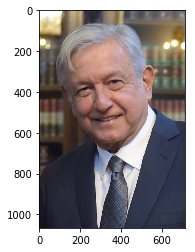

In [4]:
image = np.expand_dims(plt.imread(amlo_path  + '1.jpg'),0)
plt.imshow(image[0])

## Echamos un vistazo a cómo van quedando las imágenes

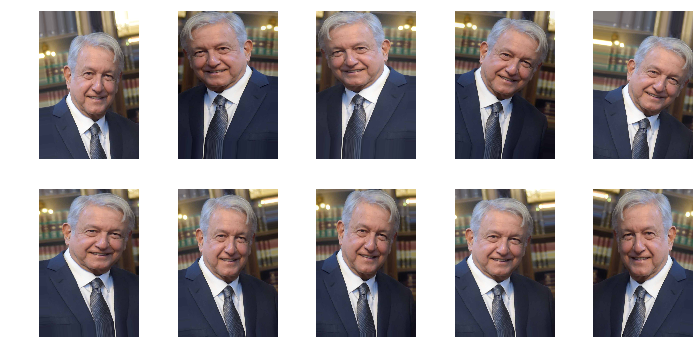

In [20]:
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(10)]
sub_plots(aug_images, figsize=(12,6), rows=2)

## Éste es el script que corrí en el servidor que tenemos en LCC. Se tarda bastante ahi

In [ ]:
for filename, i in enumerate(os.listdir(amlo_path)):
    if filename.endswith('.jpg'):
         image = np.expand_dims(plt.imread(amlo_path + filename), 0)
         aug_iter = gen.flow(image)
         aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(50)]
         plots(i, aug_images, figsize=(12,6))
    elif filename.endswith('.jpeg'):
        image = np.expand_dims(plt.imread(amlo_path + filename), 0)
        aug_iter = gen.flow(image)
        aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(50)]
        plots(i, aug_images, figsize=(12,6), jpeg=True)